<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/Ejercicio_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

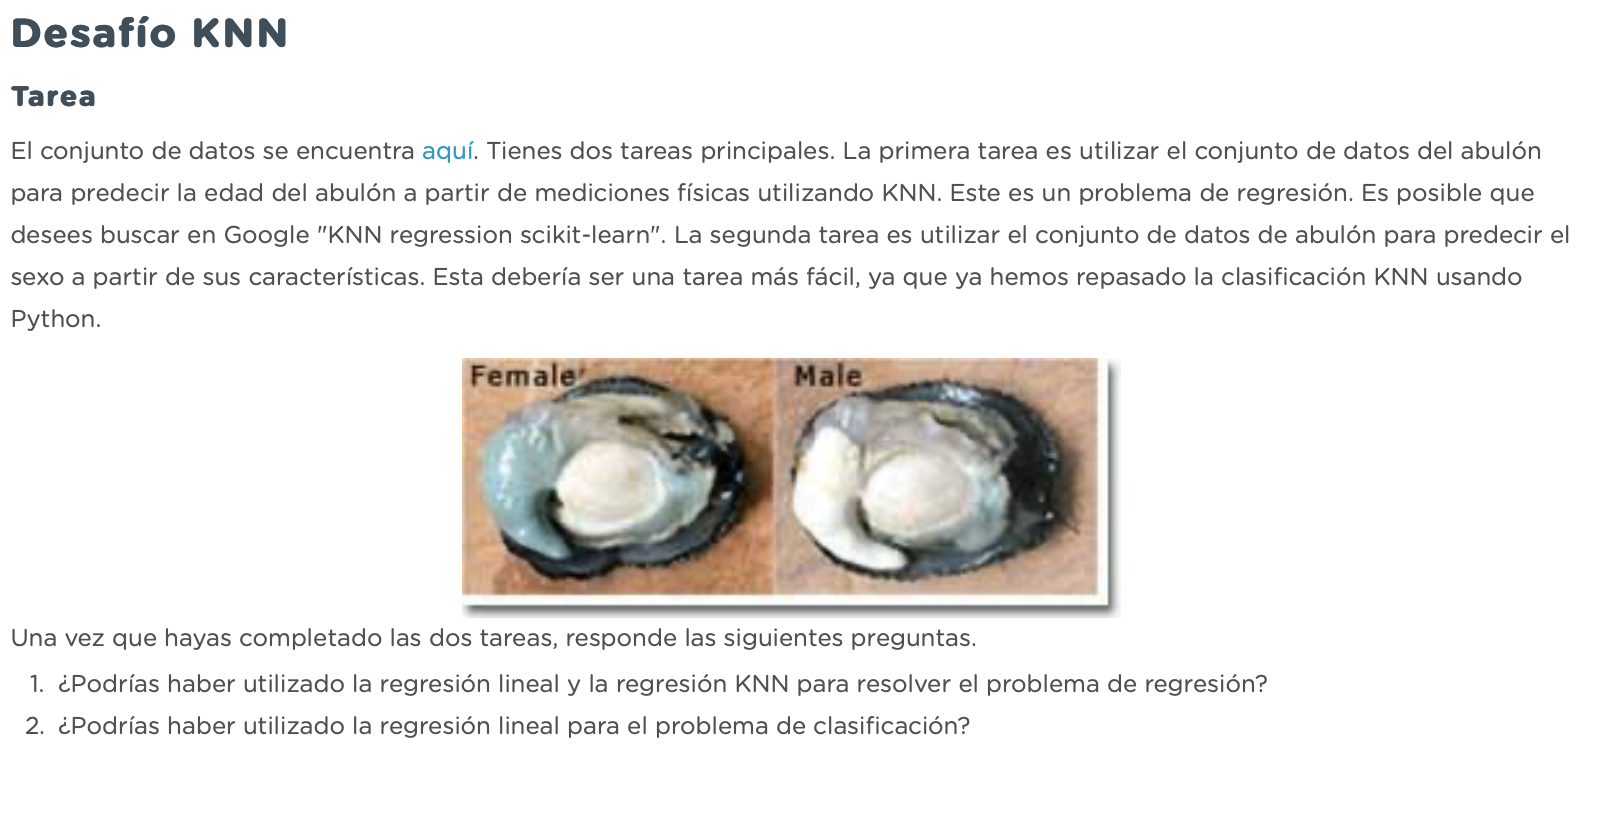

# 1 Importar librería

In [25]:
import urllib
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Para escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# 2 Montar Google

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3 Data importation

In [10]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/abalone_csv.csv'
df = pd.read_csv(filename)
df.head()

Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Class_number_of_rings
0   M   0.455     0.365  ...          0.1010         0.150                     15
1   M   0.350     0.265  ...          0.0485         0.070                      7
2   F   0.530     0.420  ...          0.1415         0.210                      9
3   M   0.440     0.365  ...          0.1140         0.155                     10
4   I   0.330     0.255  ...          0.0395         0.055                      7

[5 rows x 9 columns]

In [4]:
df.tail()

Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Class_number_of_rings
4172   F   0.565     0.450  ...          0.2390        0.2490                     11
4173   M   0.590     0.440  ...          0.2145        0.2605                     10
4174   M   0.600     0.475  ...          0.2875        0.3080                      9
4175   F   0.625     0.485  ...          0.2610        0.2960                     10
4176   M   0.710     0.555  ...          0.3765        0.4950                     12

[5 rows x 9 columns]

In [5]:
df.shape

(4177, 9)

In [6]:
df.dtypes

Sex                       object
Length                   float64
Diameter                 float64
Height                   float64
Whole_weight             float64
Shucked_weight           float64
Viscera_weight           float64
Shell_weight             float64
Class_number_of_rings      int64
dtype: object

In [11]:
df.isnull().sum()

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
dtype: int64

In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Class_number_of_rings'],
      dtype='object')

3.1 Name / Data Type / Measurement Unit / Description 
----------------------------- 
* Sex / nominal / -- / M, F, and I (infant) 
* Length / continuous / mm / Longest shell measurement 
* Diameter / continuous / mm / perpendicular to length 
* Height / continuous / mm / with meat in shell 
* Whole weight / continuous / grams / whole abalone 
* Shucked weight / continuous / grams / weight of meat 
* Viscera weight / continuous / grams / gut weight (after bleeding) 
* Shell weight / continuous / grams / after being dried 
* Rings / integer / -- / +1.5 gives the age in years 

El primer ejercicio busca predecir la edad del abulon a partir de las mediciones físicas.
Por lo tanto , tenemos que aislar el target Rings, desde la cual se requiere predecir

In [12]:
df = df.copy()

## 3.2 Organizar los datos en una matriz de características y un vector de destino

In [15]:
X = df.loc[:, ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']]

In [16]:
# La matriz debe ser bidimensional
X.shape

(4177, 8)

In [27]:
X.head()

Sex  Length  Diameter  ...  Shucked_weight  Viscera_weight  Shell_weight
0   M   0.455     0.365  ...          0.2245          0.1010         0.150
1   M   0.350     0.265  ...          0.0995          0.0485         0.070
2   F   0.530     0.420  ...          0.2565          0.1415         0.210
3   M   0.440     0.365  ...          0.2155          0.1140         0.155
4   I   0.330     0.255  ...          0.0895          0.0395         0.055

[5 rows x 8 columns]

In [28]:
y = df.loc[:, 'Class_number_of_rings'].values

In [29]:
y.shape

(4177,)

In [30]:
y

array([15,  7,  9, ...,  9, 10, 12])

# 4 One hot encoding

In [32]:
X = pd.get_dummies(X)
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [33]:
escala = X.values
escala_minmax = preprocessing.MinMaxScaler().fit_transform(escala)

# Crear instancia de modelo

Este es un lugar donde puedes ajustar los hiperparámetros de un modelo. En el caso de KNN n_neighbors=1 es un modelo en el que la etiqueta de un punto desconocido es la misma que la etiqueta del punto más cercano en el que encajaba. Ten en cuenta que ajustar nuestro modelo a los mismos datos que usaremos para hacer predicciones no será algo que hagamos durante el resto del curso.

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Entrenar el modelo

In [36]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predecir los valores de los mismos datos en los que se ajustó

In [37]:
predictions = knn.predict(X)

In [38]:
predictions

array([15,  7,  9, ...,  9, 10, 12])

In [39]:
# calcular la precisión de la clasificación
score = knn.score(X, y)
score

1.0

In [40]:
predictions.mean().round(4)

9.9337